In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
#Import the API Key
from config import weather_api_key
#Import the requests library
import requests

# Import the time module.
import time


In [2]:
# Get today's date in seconds.
today = time.time()
today

1633646334.2467954

In [3]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e219646aceb5e1384c0d023db7cd879c


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
#Import the requests library
import requests

#Import the API Key
from config import weather_api_key

#Import datetime module from datetime library
from datetime import datetime



In [8]:
#RETRIEVE WEATHER FROM LIST OF CITIES
#Create an emty list to hold the weather dat
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bairiki
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | arman
Processing Record 12 of Set 1 | orlik
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | platteville
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | reconquista
Processing Record 20 of Set 1 | eyl
Processing Record 21 of Set 1 | kota tinggi
Processing Record 22 of Set 1 | ikalamavony
Processing Record 23 of Set 1 | port hardy
Processing 

Processing Record 40 of Set 4 | wonthaggi
Processing Record 41 of Set 4 | daraitan
Processing Record 42 of Set 4 | komsomolskiy
Processing Record 43 of Set 4 | thaba-tseka
Processing Record 44 of Set 4 | alyangula
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | dalbandin
Processing Record 47 of Set 4 | san cristobal
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | ahipara
Processing Record 1 of Set 5 | buin
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | belmonte
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | kiama
Processing Record 10 of Set 5 | rome
Processing Record 11 of Set 5 | chapais
Processin

City not found. Skipping...
Processing Record 25 of Set 8 | talnakh
Processing Record 26 of Set 8 | nouadhibou
Processing Record 27 of Set 8 | chimoio
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | shubarshi
Processing Record 30 of Set 8 | quatre cocos
Processing Record 31 of Set 8 | nuuk
Processing Record 32 of Set 8 | tomatlan
Processing Record 33 of Set 8 | guaruja
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | messina
Processing Record 36 of Set 8 | loukhi
Processing Record 37 of Set 8 | rungata
City not found. Skipping...
Processing Record 38 of Set 8 | dzilam gonzalez
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | dandong
Processing Record 41 of Set 8 | talas
Processing Record 42 of Set 8 | apodi
Processing Record 43 of Set 8 | neryungri
Processing Record 44 of Set 8 | patacamaya
Processing Record 45 of Set 8 | russell
Processing Record 46 of Set 8 | gat
Processing Record 47 of Set 8 | kieta
Processing

Processing Record 13 of Set 12 | owase
Processing Record 14 of Set 12 | muisne
Processing Record 15 of Set 12 | yarada
Processing Record 16 of Set 12 | mecca
Processing Record 17 of Set 12 | dibaya
City not found. Skipping...
Processing Record 18 of Set 12 | nador
Processing Record 19 of Set 12 | narasannapeta
Processing Record 20 of Set 12 | nampula
Processing Record 21 of Set 12 | valdivia
Processing Record 22 of Set 12 | tidore
City not found. Skipping...
Processing Record 23 of Set 12 | kricim
City not found. Skipping...
Processing Record 24 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 12 | dzheguta
Processing Record 26 of Set 12 | callaway
Processing Record 27 of Set 12 | nzega
Processing Record 28 of Set 12 | zima
Processing Record 29 of Set 12 | tachov
Processing Record 30 of Set 12 | uroteppa
City not found. Skipping...
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | kyaikkami
Processing Record 33 of Set 12 | yumen
Processing 

In [9]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bairiki,1.3292,172.9752,86.00,66,40,10.36,KI,2021-10-07 22:38:57
1,Hermanus,-34.4187,19.2345,55.90,73,0,7.43,ZA,2021-10-07 22:30:36
2,Cayenne,4.9333,-52.3333,83.08,78,0,5.01,GF,2021-10-07 22:32:11
3,Albany,42.6001,-73.9662,69.67,83,11,2.98,US,2021-10-07 22:30:05
4,Sinnamary,5.3833,-52.9500,81.55,79,48,11.23,GF,2021-10-07 22:39:00
5,Mataura,-46.1927,168.8643,58.48,52,99,4.12,NZ,2021-10-07 22:31:01
6,Ola,59.5833,151.2833,30.16,51,23,2.39,RU,2021-10-07 22:39:01
7,Ushuaia,-54.8000,-68.3000,46.06,57,0,0.00,AR,2021-10-07 22:30:46
8,Atuona,-9.8000,-139.0333,77.97,76,13,15.01,PF,2021-10-07 22:30:40
9,Hobart,-42.8794,147.3294,58.26,70,20,1.01,AU,2021-10-07 22:27:29


In [10]:
#REORDER COLUMNS
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bairiki,KI,2021-10-07 22:38:57,1.3292,172.9752,86.00,66,40,10.36
1,Hermanus,ZA,2021-10-07 22:30:36,-34.4187,19.2345,55.90,73,0,7.43
2,Cayenne,GF,2021-10-07 22:32:11,4.9333,-52.3333,83.08,78,0,5.01
3,Albany,US,2021-10-07 22:30:05,42.6001,-73.9662,69.67,83,11,2.98
4,Sinnamary,GF,2021-10-07 22:39:00,5.3833,-52.9500,81.55,79,48,11.23
...,...,...,...,...,...,...,...,...,...
555,Tateyama,JP,2021-10-07 22:54:16,34.9833,139.8667,76.01,79,45,11.56
556,Butterworth,MY,2021-10-07 22:54:17,5.3991,100.3638,80.01,90,40,1.99
557,Verkhneuralsk,RU,2021-10-07 22:54:19,53.8769,59.2106,32.20,84,7,3.09
558,Deputatskiy,RU,2021-10-07 22:54:20,69.3000,139.9000,18.90,75,100,6.73


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#CREATE SCATTER PLOT FROM CITY_DATA_DF
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


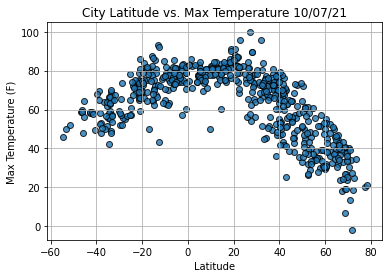

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

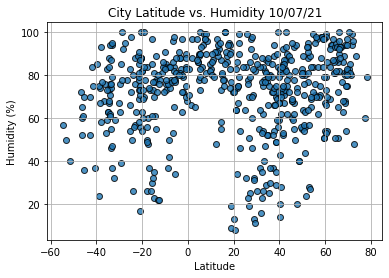

In [14]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

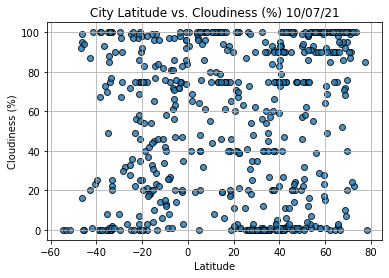

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

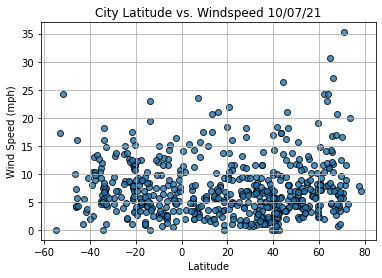

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()